Afin de créer une séquence de tâches à exécuter, nous pouvons utiliser `DO LOOP` en SAS. Nous générerons différentes variables aléatoires suivant différentes distributions de probabilité (des exemples très simples).

# DoLoop

## Syntaxe 

```
DO index-variable=start TO stop <BY increment>;
END;
```

Afin de simuler des variables pseudo-aléatoires, nous devons d'abord créer un _data-step_.

```
DATA nom_ensemble_donnees
    DO index-variable=start TO stop <BY increment>;
        iterattion;
    OUTPUT;
    END;
RUN
```

Pour créer TOUTES les variables à l'intérieur de la boucle, nous devons ajouter `OUTPUT`. Sinon, SAS afficher seulement la dernière valeur du résultat de la boucle

In [1]:
data loop ;
    do i=5 to 15 by 2;
        x=i+1;
        y=x**2;        
        output;
    end;
run;
title"Un exemple de boucle";
proc print data=loop noobs;
run;

SAS Connection established. Subprocess id is 2800



i,x,y
5,6,36
7,8,64
9,10,100
11,12,144
13,14,196
15,16,256


# Variables pseudo-aléatoires générées par des distributions de probabilité

Dans les exemples suivants, vous verrez la ligne `call streaminit(123);`. Cette fonction de SAS permet de réinitialiser l'état interne du générateur aléatoire (spécifié par un entier de l'intervalle [0,2^31-1]) ). 

Cela nous permet d'obtenir les mêmes valeurs générées à chaque exécution du code.

### Distribution BERNOULLI

$$f(k;p)={\begin{cases}p&{\text{if }}k=1,\\[6pt]1-p&{\text{if }}k=0.\end{cases}}$$

* $x$ peut prendre des valeurs de 0 ou 1
* $p$ est une constante, variable ou expression qui donne la probabilité de succès 

In [2]:
data bernouill (drop=i p);
 call streaminit(123);
 p=.5;
 do i=1 to 10;
     x=RAND('BERNOULLI', p);
     output;
end;
run;
title;
title"variables pseudo-aléatoires générées par une distribution BERNOULLI";
proc print data =bernouill noobs;
run;

x
0
1
1
1
1
1
1
1
1
1


Remarquez que les valeurs générées sont différentes lorsque nous changeons l'état interne du générateur aléatoire (_seed_) à `456`

In [3]:
data bernouill (drop=i p);
 call streaminit(456);
 p=.5;
 do i=1 to 10;
     x=RAND('BERNOULLI', p);
     output;
end;
run;
title;
title"variables pseudo-aléatoires générées par une distribution BERNOULLI";
proc print data =bernouill noobs;
run;

x
0
1
1
0
1
1
1
0
1
1


### Distribution BINOMIALE

$x$ est un entier qui peut prendre les valeurs $0, 1, \dots n$ avec une fonction de probabilité:

$${\Pr(X=k)={n \choose k}p^{k}(1-p)^{n-k}}$$

In [4]:
data BINOMIAL (drop=i n p);
 call streaminit(123);
 p=.5;
 n=20;
 do i=1 to 10;
     x=RAND('BINOMIAL', p, n);
     output;
end;
run;
title"variables pseudo-aléatoires générées par une distribution BINOMIAL";
proc print data =BINOMIAL noobs;
run;


x
10
6
7
9
9
9
9
8
6
7


## Distribution Noramle

$${\displaystyle f(x\;|\;\mu ,\sigma ^{2})={\frac {1}{\sqrt {2\pi \sigma ^{2}}}}\;e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}}$$

* $\mu$ est la moyenne (0 par défaut)
* $\sigma$ est l'écart-type (1 par défaut)

In [7]:
data normal1 (drop=i);
 call streaminit(123);
 do i=1 to 10;
     rnorm=rand('Normal', 5, 2);
     output;
end;
run;
title"variables pseudo-aléatoires générées par une distribution Normal $\left(\mu=5, \sigma=2\right)$";
proc print data =normal1 noobs;
run;

rnorm
5.16788
4.04581
3.57504
4.62113
2.18285
2.71756
4.02626
3.01661
4.95625
5.85879


## Distribustion Uniforme 

La densité de probabilité de la loi uniforme continue est une fonction porte sur l'intervalle $\left[a,b\right]$.

$$
f(x)={\begin{cases}{\frac  {1}{b-a}}&{\text{pour }}a\leq x\leq b,\\0&{\mathrm  {sinon}}.\end{cases}}
$$

In [38]:
data UNIF (drop=i);
 call streaminit(123);
 do i=1 to 10;
     x=rand('UNIFORM'); /* car uniform de 0 a 1 */
     output;
end;
run;
title"variables pseudo-aléatoires générées par une distribution UNIFORM $\left(a=0, b=1\right)$";
proc print data =UNIF noobs;
run;
title;

x
0.58170
0.03562
0.07818
0.38785
0.32917
0.36159
0.33759
0.16920
0.05670
0.07983


## Distribution Exponentielle
La densité de probabilité de la distribution exponentielle de paramètre $\lambda > 0$ prend la forme :


$$
f(x)=\left\{{\begin{matrix}\lambda e^{{-\lambda x}}&,\;x\geqslant 0,\\0&,\;x<0.\end{matrix}}\right.
$$

Ici, on génère 5 variables aléatoires $x_i\sim exp\left(\lambda=3\right)$

In [39]:
data exponential (drop=i);
 call streaminit(123);
 do i=1 to 5;
     x=rand('exponential',3); /* car uniform de 0 a 1 */
     output;
end;
run;
proc print data =exponential (obs=10) noobs ;
run;

x
1.6254
10.0044
7.6462
2.8414
3.3335


# %let et &n

Il est plus commode de fixer la variable au début du code, cela facilite la modification du code. Nous le ferons avec `%let n=n;` afin de pouvoir réutiliser cette même commande dans les macros que nous verrons un peu plus loin.

In [42]:
%let n=5;
data EXPOLet (keep=x);
    call streaminit(123);
    do i=1 to &n;
        x=rand('exponential',3);
        output;
    end;
run;
proc print data =EXPOLet noobs ;
run;

x
1.6254
10.0044
7.6462
2.8414
3.3335


# SAS Macro

Nous verrons ici une brève introduction à la création des macros en SAS, puisque vous avez eu tout un cours sur les macros en VBA., le but est le même, c'est seulement la syntaxe qui diffère.

Une macro commence toujours par `%macro nomMacro(paramètre_1, paramètre_1,...);` et termine toujours par `%mend nomMacro;`

In [57]:
%macro genExpoLambda(n, lambda,graine,NomDataSet);
data &NomDataSet (keep=x i);
    call streaminit(&graine);
    do i=1 to &n;
        x=rand('exponential',&lambda);
        output;
    end;
run;
proc print data =&NomDataSet (obs=5) noobs ;
title " &n Variables pseudo-aléatoires générées selon une distribution exponentielle";
title2 "de paramètre $\lambda=&lambda$";
title3 "le seed du générateur a été fixée à &graine";
run;
%mend genExpoLambda;

Faisons appel maintenant à cette nouvelle macro que nous venons de créer.

In [58]:
%genExpoLambda(10, 3,123, donne_expo)

i,x
1,1.6254
2,10.0044
3,7.6462
4,2.8414
5,3.3335


Nous remarquons dans le titre ci-dessous que nous avons même intégré les paramètres de la macro dans le titre affiché seulement en ajoutant le caractère `&` devant le nom du paramètre. Pour ce qui est entre les deux signes `$`, c'est seulement la syntaxe du $\href{https://www.latex-project.org/}{\LaTeX}$. Ce n'est pas obligatoire pour ce cours.

Il est très suggéré de bien documenter et identifier son code SAS. Voici un exemple tiré de la documentation SAS afin d'insérer dans l'entête de votre code `.sas`.

In [ ]:
/****************************************************************/
 /*          S A S   S A M P L E   L I B R A R Y                 */
 /*                                                              */
 /*    NAME: EXPPLOT                                             */
 /*   TITLE: Exponential Probability Plotting                    */
 /* PRODUCT: SAS                                                 */
 /*  SYSTEM: ALL                                                 */
 /*    KEYS: SCATTER PLOT,                                       */
 /*   PROCS: CHART MEANS PLOT RANK SORT                          */
 /*    DATA:                                                     */
 /*                                                              */
 /* SUPPORT:                             UPDATE:                 */
 /*     REF:                                                     */
 /*    MISC:                                                     */
 /*                                                              */
 /****************************************************************/

# Graphique avec `sgplot`

Dans la deuxième partie du cours (lorsque nous verrons `R`), nous verrons comment faire des graphiques plus sophistiqués. Toutefois, dans la partie `SAS`, prenons seulement l'exemple de `sgplot`. Si vous voulez approfondir plus le sujet, vous pouvez lire le guide sur [ODS Graphics](http://support.sas.com/documentation/cdl/en/grstatproc/65235/HTML/default/viewer.htm#grstatprocwhatsnew93.htm).

Mais d'abord, générons 1000 variables aléatoires de loi gaussienne de $\mu=10, \sigma=2$

In [104]:
data normal1 (drop=i);
 call streaminit(123);
 do i=1 to 1000;
     y=rand('Normal', 10, 2);
     Y_CDF=CDF('NORMAL',y, 10,2);
     Y_PDF=PDF('NORMAL',y, 10,2);
     output;
end;
run;

In [105]:
proc print data=normal1 (obs=5) noobs ;
run;

y,Y_CDF,Y_PDF
10.1679,0.53345,0.19877
9.0458,0.31665,0.17801
8.5750,0.23808,0.15476
9.6211,0.42488,0.19592
7.1829,0.07948,0.07397


Traçons la fonction de masse **PDF**


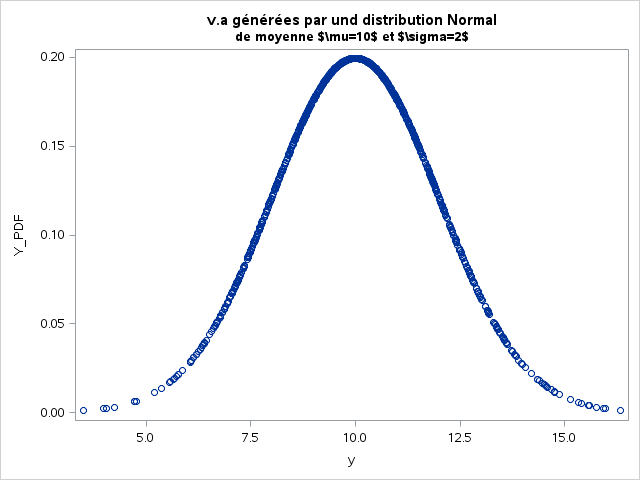

In [112]:
proc sgplot data=normal1;
  title "v.a générées par und distribution Normal";
  title2 "de moyenne $\mu=10$ et $\sigma=2$";
  scatter x=y y=Y_PDF;
run;

Regardons maintenant la cumulative (fonction de répartition) **CDF**


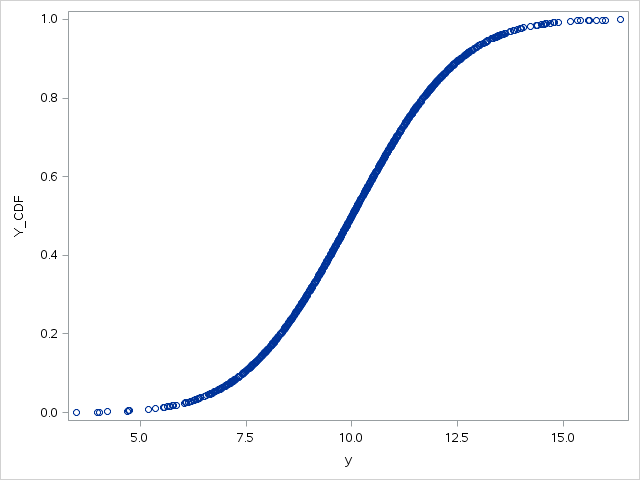

In [97]:
proc sgplot data=normal1;
  title;
  scatter x=y y=Y_CDF;
run;


Vérifions tout cela avec la fonction `PROC univariate` où l'on voit bien que la moyenne de nos valeurs $\hat{\mu}=10.08613$ est très proche de notre moyenne $\mu=10$ que nous avons imposé à notre fonction `RANDOM`. 

Sans oublier l'écart-type $\hat{\sigma}=2.01038$


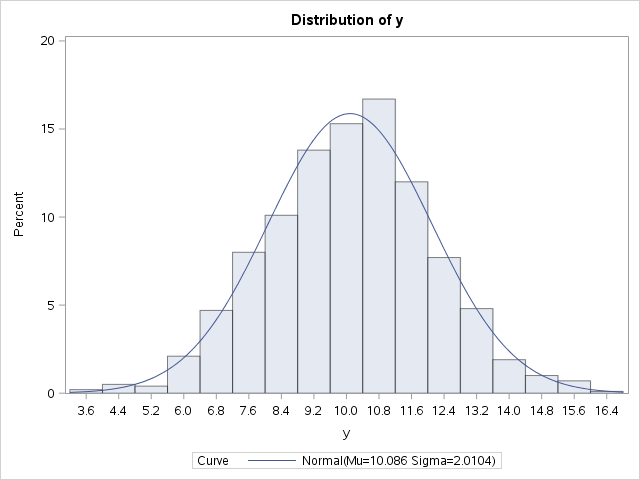

In [103]:
title;
proc univariate data=normal1 NOPRINT;
    histogram y / NORMAL;
run;
